In [17]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
warnings.filterwarnings('ignore')

In [29]:
mdata = pdr.DataReader('^BVSP',data_source='yahoo',start='2015-1-1', end = '2020-05-28')
mdata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50005.0,48345.0,50005.0,48512.0,2882100.0,48512.0
2015-01-05,48512.0,47264.0,48512.0,47517.0,3866100.0,47517.0
2015-01-06,48061.0,47338.0,47517.0,48001.0,4559300.0,48001.0
2015-01-07,49882.0,48006.0,48006.0,49463.0,4408800.0,49463.0
2015-01-08,50261.0,49017.0,49463.0,49943.0,3621900.0,49943.0


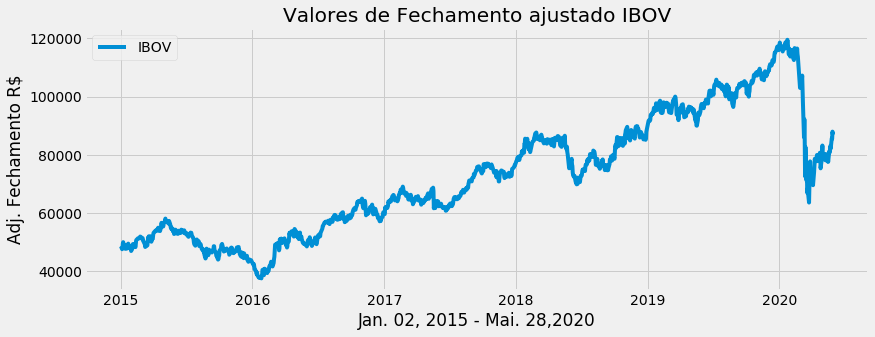

In [30]:
#vamos visualizar
plt.figure(figsize=(12.5,4.5))
plt.plot(mdata['Adj Close'], label='IBOV')
plt.title('Valores de Fechamento ajustado IBOV')
plt.xlabel('Jan. 02, 2015 - Mai. 28,2020')
plt.ylabel('Adj. Fechamento R$')
plt.legend(loc='upper left')
plt.show()

In [31]:
media_20 = mdata['Adj Close'].rolling(20).mean()
media_50 = mdata['Adj Close'].rolling(50).mean()

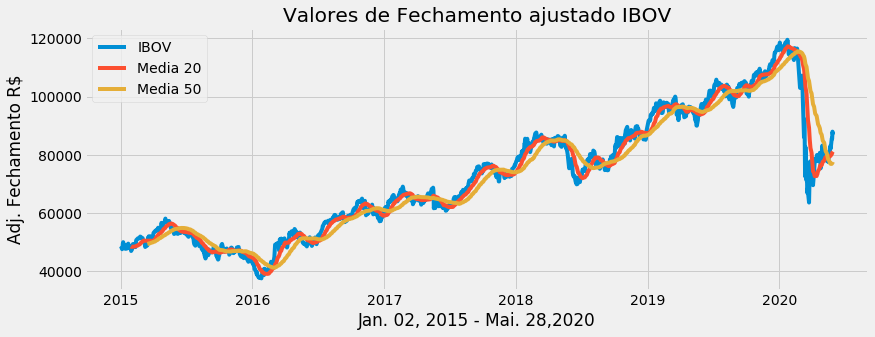

In [32]:
#vamos visualizar
plt.figure(figsize=(12.5,4.5))
plt.plot(mdata['Adj Close'], label='IBOV')
plt.plot(media_20, label='Media 20')
plt.plot(media_50, label='Media 50')
plt.title('Valores de Fechamento ajustado IBOV')
plt.xlabel('Jan. 02, 2015 - Mai. 28,2020')
plt.ylabel('Adj. Fechamento R$')
plt.legend(loc='upper left')
plt.show()

In [33]:
# vamos criar um novo data frame com o fechamento, media20 media 50
novo_data = pd.DataFrame()
novo_data['IBOV'] = mdata['Adj Close']
novo_data['Media20'] = media_20
novo_data['Media50'] = media_50
novo_data

,IBOV,Media20,Media50
Date,,,
2015-01-02,48512.0,NaN,NaN
2015-01-05,47517.0,NaN,NaN
2015-01-06,48001.0,NaN,NaN
2015-01-07,49463.0,NaN,NaN
2015-01-08,49943.0,NaN,NaN
...,...,...,...
2020-05-22,82173.0,79704.2,76857.34
2020-05-25,85663.0,80220.8,76867.18
2020-05-26,85469.0,80582.3,77124.90


In [34]:
#vamos criar uma func p/ criar o sinal de compra e venda
def compra_venda(novo_data):
    sinal_compra = []
    sinal_venda = []
    flag = -1
    
    for i in range(len(novo_data)):
        if novo_data['Media20'][i]> novo_data['Media50'][i]:
            if flag != 1:
                sinal_compra.append(novo_data['IBOV'][i])
                sinal_venda.append(np.nan)
                flag = 1
            else:
                sinal_compra.append(np.nan)
                sinal_venda.append(np.nan)
        elif novo_data['Media20'][i] < novo_data['Media50'][i]:
            if flag != 0:
                sinal_compra.append(np.nan)
                sinal_venda.append(novo_data['IBOV'][i])
                flag = 0
            else:
                sinal_compra.append(np.nan)
                sinal_venda.append(np.nan)
        else:
            sinal_compra.append(np.nan)
            sinal_venda.append(np.nan)
            
    return (sinal_compra,sinal_venda)

In [35]:
# Salvando historico de preço de venda e compra em variaveis
compra_venda  = compra_venda(novo_data)
novo_data['Sinal_de_Compra'] = compra_venda[0]
novo_data['Sinal_de_Venda'] = compra_venda[1]

In [36]:
novo_data

,IBOV,Media20,Media50,Sinal_de_Compra,Sinal_de_Venda
Date,,,,,
2015-01-02,48512.0,NaN,NaN,NaN,NaN
2015-01-05,47517.0,NaN,NaN,NaN,NaN
2015-01-06,48001.0,NaN,NaN,NaN,NaN
2015-01-07,49463.0,NaN,NaN,NaN,NaN
2015-01-08,49943.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-05-22,82173.0,79704.2,76857.34,NaN,NaN
2020-05-25,85663.0,80220.8,76867.18,NaN,NaN
2020-05-26,85469.0,80582.3,77124.90,NaN,NaN


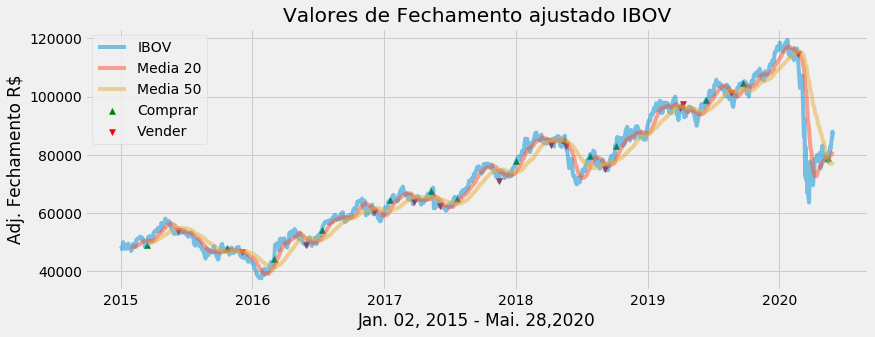

In [37]:
#vamos visualizar
plt.figure(figsize=(12.5,4.5))
plt.plot(novo_data['IBOV'], label='IBOV', alpha = 0.50)
plt.plot(novo_data['Media20'], label='Media 20', alpha = 0.50)
plt.plot(novo_data['Media50'], label='Media 50', alpha = 0.50)
plt.scatter(novo_data.index,novo_data['Sinal_de_Compra'],label = 'Comprar', marker='^', color = 'green')
plt.scatter(novo_data.index,novo_data['Sinal_de_Venda'],label = 'Vender', marker='v', color = 'red')
plt.title('Valores de Fechamento ajustado IBOV')
plt.xlabel('Jan. 02, 2015 - Mai. 28,2020')
plt.ylabel('Adj. Fechamento R$')
plt.legend(loc='upper left')
plt.show()